In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [21]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [22]:
stock_data.head()

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100

In [23]:
stock_data.tail()

Price               Close           High            Low           Open  \
Ticker            BTC-USD        BTC-USD        BTC-USD        BTC-USD   
Date                                                                     
2025-06-04  104731.984375  105997.695312  104232.703125  105434.367188   
2025-06-05  101575.953125  105936.687500  100436.882812  104750.781250   
2025-06-06  104390.343750  105376.773438  101169.570312  101574.367188   
2025-06-07  105615.625000  105972.757812  103987.312500  104390.648438   
2025-06-08  105558.523438  105778.140625  105083.140625  105639.773438   

Price            Volume  
Ticker          BTC-USD  
Date                     
2025-06-04  44544857105  
2025-06-05  57479298400  
2025-06-06  48856653697  
2025-06-07  38365033776  
2025-06-08  36487520256

In [24]:
stock_data.describe().T

count          mean           std           min  \
Price  Ticker                                                      
Close  BTC-USD  3918.0  2.263241e+04  2.631092e+04  1.781030e+02   
High   BTC-USD  3918.0  2.309829e+04  2.681145e+04  2.117310e+02   
Low    BTC-USD  3918.0  2.209293e+04  2.573005e+04  1.715100e+02   
Open   BTC-USD  3918.0  2.260675e+04  2.628125e+04  1.768970e+02   
Volume BTC-USD  3918.0  1.958691e+10  2.095049e+10  5.914570e+06   

                         25%           50%           75%           max  
Price  Ticker                                                           
Close  BTC-USD  2.052082e+03  9.857381e+03  3.684543e+04  1.116733e+05  
High   BTC-USD  2.230652e+03  1.008004e+04  3.775659e+04  1.119702e+05  
Low    BTC-USD  1.978793e+03  9.606127e+03  3.547260e+04  1.092851e+05  
Open   BTC-USD  2.045912e+03  9.843108e+03  3.680465e+04  1.116794e+05  
Volume BTC-USD  8.704812e+08  1.576398e+10  3.093348e+10  3.509679e+11

In [25]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3918 entries, 2014-09-17 to 2025-06-08
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3918 non-null   float64
 1   (High, BTC-USD)    3918 non-null   float64
 2   (Low, BTC-USD)     3918 non-null   float64
 3   (Open, BTC-USD)    3918 non-null   float64
 4   (Volume, BTC-USD)  3918 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 183.7 KB


In [26]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [27]:
#Close price data
closing_price = stock_data[['Close']]

In [28]:
closing_price['Close']

Ticker            BTC-USD
Date                     
2014-09-17     457.334015
2014-09-18     424.440002
2014-09-19     394.795990
2014-09-20     408.903992
2014-09-21     398.821014
...                   ...
2025-06-04  104731.984375
2025-06-05  101575.953125
2025-06-06  104390.343750
2025-06-07  105615.625000
2025-06-08  105558.523438

[3918 rows x 1 columns]

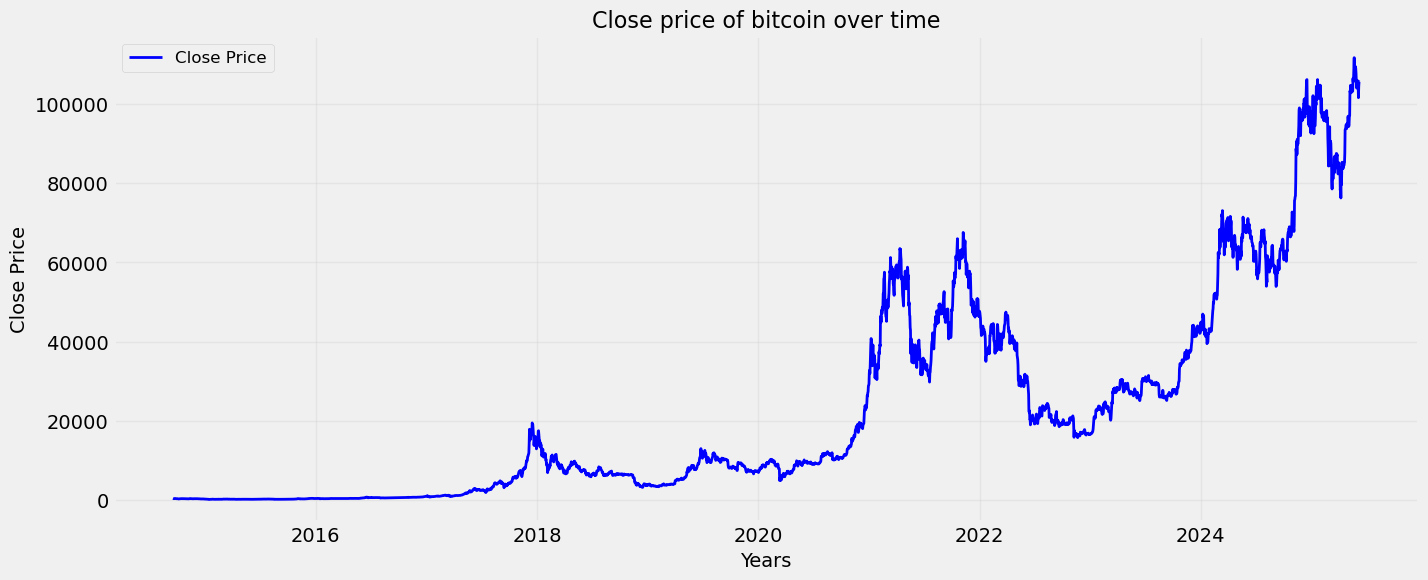

In [29]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [30]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [31]:
df1 = pd.DataFrame(temp_data)

In [32]:
df1.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0
9  80.0

In [35]:
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [36]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

C:\Users\T580\AppData\Local\Temp\ipykernel_16884\194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
C:\Users\T580\AppData\Local\Temp\ipykernel_16884\194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


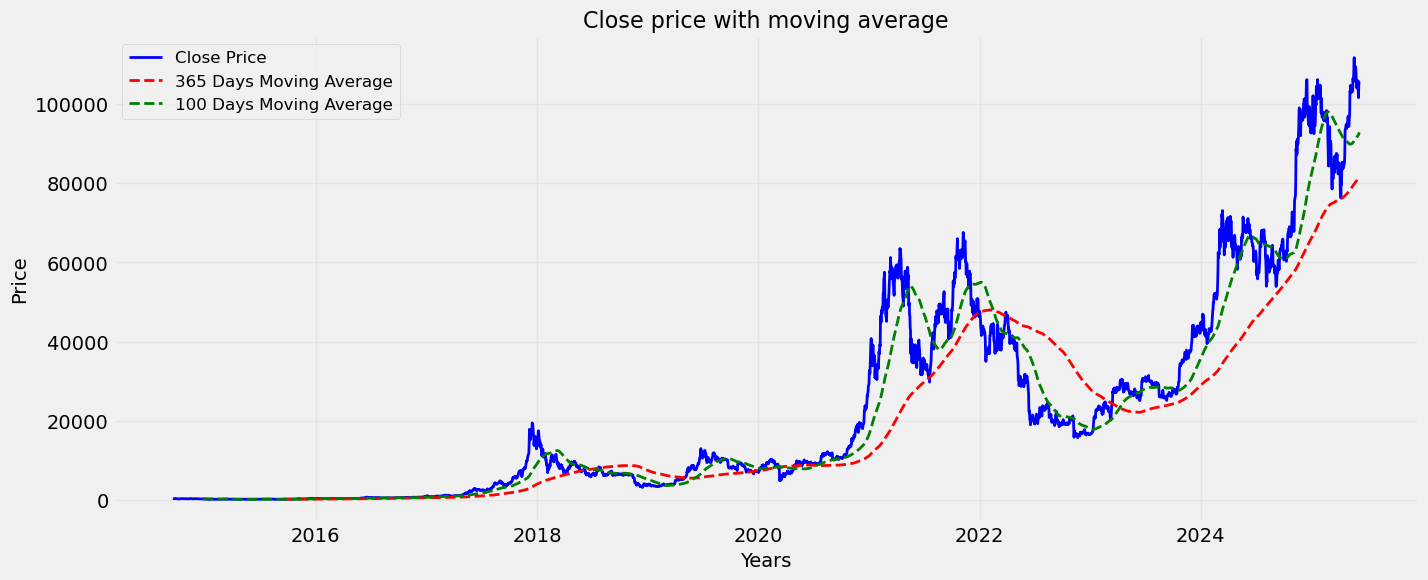

In [37]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [38]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [39]:
len(scaled_data)

3918

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [43]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [44]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [45]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

f:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 108s 115ms/step - loss: 0.0025
Epoch 2/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 84s 122ms/step - loss: 3.9818e-04
Epoch 3/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 101s 147ms/step - loss: 2.2868e-04
Epoch 4/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 111s 161ms/step - loss: 1.5276e-04
Epoch 5/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 139s 201ms/step - loss: 1.4652e-04
Epoch 6/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 139s 201ms/step - loss: 1.1429e-04
Epoch 7/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 125s 181ms/step - loss: 1.3889e-04
Epoch 8/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 114s 166ms/step - loss: 1.3239e-04
Epoch 9/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 127s 185ms/step - loss: 1.2743e-04
Epoch 10/10
688/688 ━━━━━━━━━━━━━━━━━━━━ 132s 191ms/step - loss: 1.4846e-04


In [47]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step


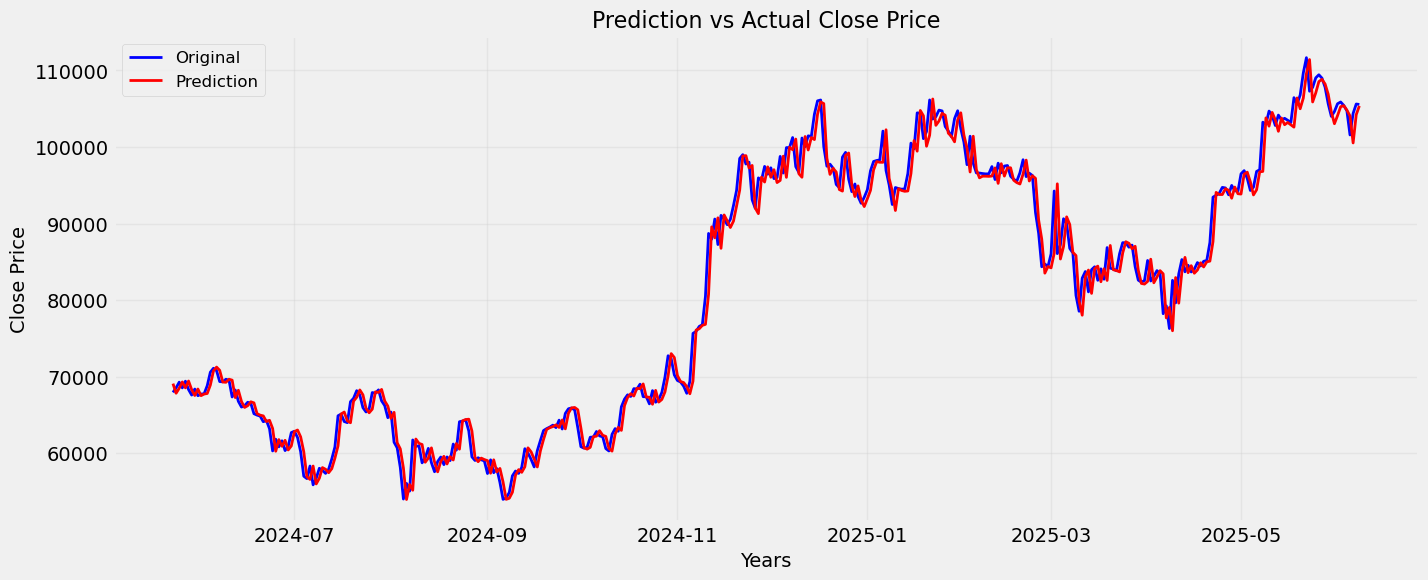

In [48]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()


In [49]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


In [50]:
future_predictions

[array([[105071.32]], dtype=float32),
 array([[104462.875]], dtype=float32),
 array([[103809.695]], dtype=float32),
 array([[103146.44]], dtype=float32),
 array([[102491.81]], dtype=float32),
 array([[101856.]], dtype=float32),
 array([[101244.02]], dtype=float32),
 array([[100657.766]], dtype=float32),
 array([[100097.27]], dtype=float32),
 array([[99561.555]], dtype=float32)]

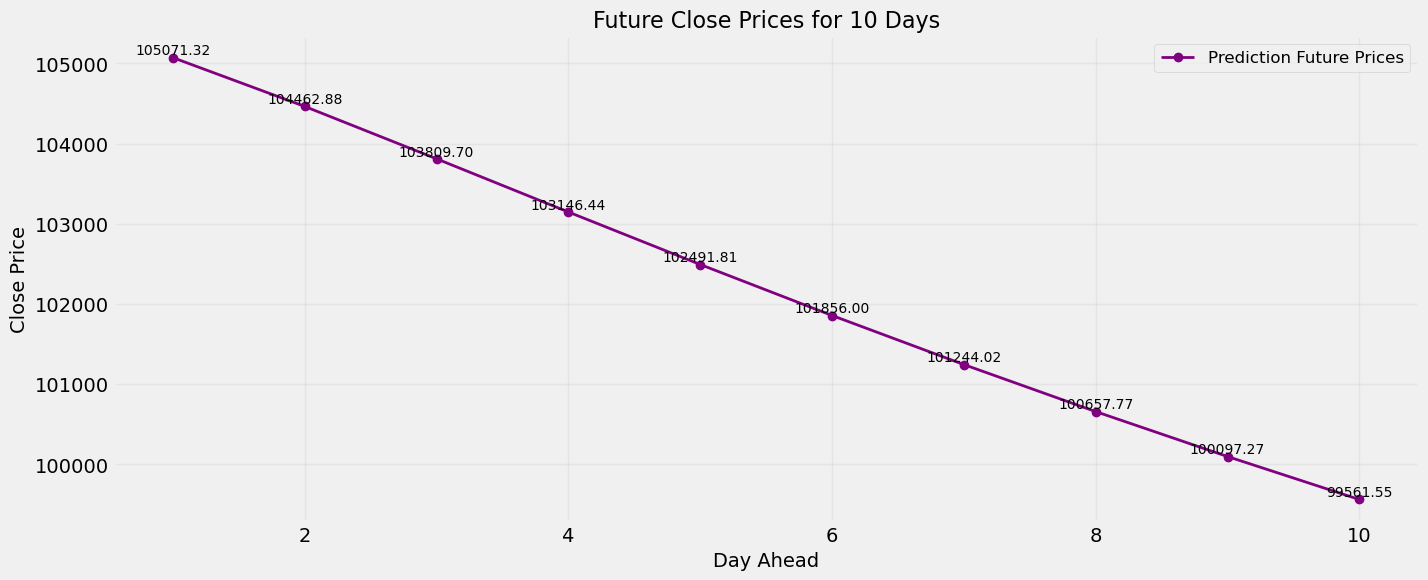

In [51]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [52]:
model.save("model.keras")